# Stock Prediction Using Machine Learning


## Installation Packages

In [ ]:
'''
pip install yfinance
pip install mplfinance
pip install pytz 
pip install xgboost
pip install plotly
pip install sklearn  

'''


## Load the Libraries

In [12]:
import plotly.graph_objects as go
import pandas as pd
import datetime as dt
import yfinance as yf
import pytz as pt
import seaborn as sns
import scipy.stats as st
import mplfinance as mpf
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler

from sklearn.model_selection import GridSearchCV
from sklearn.metrics import r2_score

                                          
from sklearn.linear_model import RidgeCV, LassoCV, LinearRegression, ElasticNet
from sklearn.svm import SVR              
                                         
from sklearn.ensemble import RandomForestRegressor
from xgboost import XGBRegressor




## Loading the Data Set, Viewing Data Attributes, and Visualizing the Data

In [23]:
current_date=dt.date.today()
last_month_date = current_date-dt.timedelta(days=300) 
current_date = current_date.strftime("%Y-%m-%d") 
last_month_date = last_month_date.strftime("%Y-%m-%d")

stock='TS'                                               
data = yf.download(stock, last_month_date, current_date)  
da= pd.DataFrame(data=data)
df = pd.read_csv('TSLA.csv')

df.head()

[*********************100%***********************]  1 of 1 completed


,Date,Open,High,Low,Close,Adj Close,Volume
0,2016-08-16,45.098000,45.438000,44.681999,44.722000,44.722000,11335500
1,2016-08-17,44.866001,44.966000,44.560001,44.647999,44.647999,8935500
2,2016-08-18,44.764000,45.132000,44.458000,44.702000,44.702000,8572500
3,2016-08-19,44.708000,45.034000,44.506001,45.000000,45.000000,8297500
4,2016-08-22,44.834000,45.021999,44.535999,44.585999,44.585999,10327500


In [24]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1258 entries, 0 to 1257
Data columns (total 7 columns):
 #   Column     Non-Null Count  Dtype  
---  ------     --------------  -----  
 0   Date       1258 non-null   object 
 1   Open       1258 non-null   float64
 2   High       1258 non-null   float64
 3   Low        1258 non-null   float64
 4   Close      1258 non-null   float64
 5   Adj Close  1258 non-null   float64
 6   Volume     1258 non-null   int64  
dtypes: float64(5), int64(1), object(1)
memory usage: 68.9+ KB


In [25]:
df.describe()

,Open,High,Low,Close,Adj Close,Volume
count,1258.000000,1258.000000,1258.000000,1258.000000,1258.000000,1.258000e+03
mean,183.274022,187.265251,178.941224,183.351102,183.351102,4.441050e+07
std,227.979867,232.845126,222.443374,227.987027,227.987027,3.035737e+07
min,36.220001,36.945999,35.397999,35.793999,35.793999,8.297500e+06
25%,54.985001,55.930001,53.929001,54.994501,54.994501,2.478255e+07
50%,66.602002,67.950001,65.445999,66.756000,66.756000,3.498150e+07
75%,165.516998,168.243504,161.504005,163.856503,163.856503,5.211238e+07
max,891.380005,900.400024,871.599976,883.090027,883.090027,3.046940e+08


## Candlestick Charts

[*********************100%***********************]  1 of 1 completed


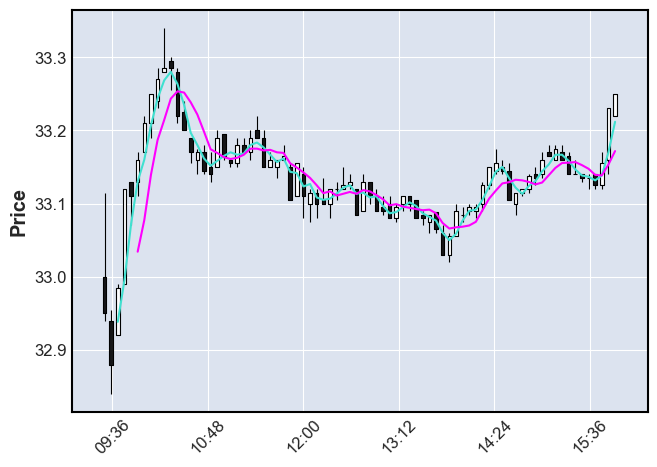

In [26]:
data = yf.download(tickers=stock, start=dt.datetime(2023,7,28), end=dt.datetime(2023, 7, 30), interval="5m")
mpf.plot(data,type='candle',mav=(3,6),volume=False,show_nontrading=True) 

In [27]:
x = df[['High', 'Low', 'Open', 'Volume']].values  # x features
y = df['Close'].values                            # y labels

C:\ProgramData\Anaconda3\lib\site-packages\seaborn\distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


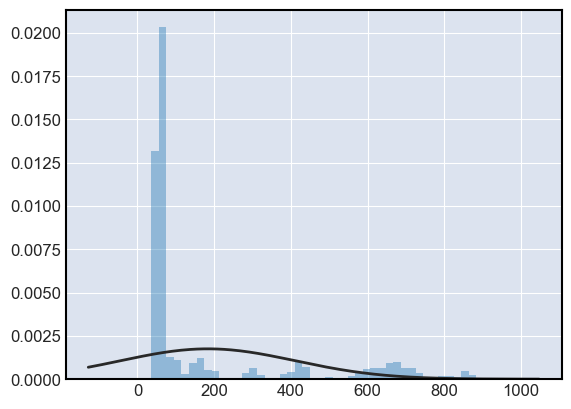

In [28]:
sns.distplot(tuple(y), kde=False, fit=st.norm)
plt.show()

## Spliting and Pre-processing the Data Set

In [29]:
x_train, x_test, y_train, y_test = train_test_split(x, y, test_size=0.2, random_state=28) 
ss = StandardScaler()                                 
x_train = ss.fit_transform(x_train)
x_test = ss.transform(x_test)
x_train[0:100]

array([[ 1.12449991,  1.07262484,  1.10994855, -0.31247231],
       [-0.53332312, -0.52635051, -0.53056132, -0.63769334],
       [-0.51031416, -0.50708511, -0.50990166, -0.41054972],
       [-0.64289733, -0.64553179, -0.63984202, -0.34734678],
       [-0.5572282 , -0.55422196, -0.55886913, -0.33212649],
       [ 0.51641811,  0.49412691,  0.53917038,  1.20330184],
       [-0.51881449, -0.51199519, -0.51674752, -0.74081732],
       [-0.53417657, -0.52717184, -0.53340431, -0.61874859],
       [-0.58595526, -0.58265586, -0.58466534, -0.69391494],
       [-0.53248674, -0.54345548, -0.52744798,  0.64961507],
       [ 1.85244862,  1.8515437 ,  1.91012818, -0.59558277],
       [-0.54484467, -0.53875072, -0.54393907, -0.58210056],
       [-0.52460088, -0.51717312, -0.52136958, -0.60275437],
       [-0.53790614, -0.53386742, -0.53227933, -0.35353809],
       [-0.56773414, -0.55991767, -0.5633778 , -0.90451616],
       [-0.5288425 , -0.52489533, -0.52651486, -0.70670063],
       [-0.5165187 , -0.

## Using Various Regression Models to Model Data Sets

In [30]:
#Set the model name.
names = ['LinerRegression',
       'Ridge',
       'Lasso',
       'Random Forrest',
       'Support Vector Regression',
       'ElasticNet',
       'XgBoost']

#Define the model.
# cv is the cross-validation idea here.
models = [LinearRegression(),
         RidgeCV(alphas=(0.001,0.1,1),cv=3),
         LassoCV(alphas=(0.001,0.1,1),cv=5),
         RandomForestRegressor(n_estimators=10),
         SVR(),
         ElasticNet(alpha=0.001,max_iter=10000),
         XGBRegressor()]
# Output the R2 scores of all regression models.

#Define the R2 scoring function.
def R2(model,x_train, x_test, y_train, y_test):
        model_fitted = model.fit(x_train,y_train)
        y_pred = model_fitted.predict(x_test)
        score = r2_score(y_test, y_pred)
        return score

#Traverse all models to score.
for name,model in zip(names,models):
        score = R2(model,x_train, x_test, y_train, y_test)
        print("{}: {:.6f}, {:.4f}".format(name,score.mean(),score.std()))

LinerRegression: 0.999567, 0.0000
Ridge: 0.999567, 0.0000
Lasso: 0.999325, 0.0000
Random Forrest: 0.999237, 0.0000


C:\ProgramData\Anaconda3\lib\site-packages\sklearn\linear_model\_coordinate_descent.py:526: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations. Duality gap: 6829.10860232122, tolerance: 4310.53370083401
  model = cd_fast.enet_coordinate_descent_gram(
C:\ProgramData\Anaconda3\lib\site-packages\sklearn\linear_model\_coordinate_descent.py:526: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations. Duality gap: 6855.463715765712, tolerance: 4081.3464231851744
  model = cd_fast.enet_coordinate_descent_gram(
C:\ProgramData\Anaconda3\lib\site-packages\sklearn\linear_model\_coordinate_descent.py:526: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations. Duality gap: 6770.913196058205, tolerance: 4203.676071862003
  model = cd_fast.enet_coordinate_descent_gram(
C:\ProgramData\Anaconda3\lib\site-packages\sklearn\linear_model\_coordinate_descent.py:526: Con

Support Vector Regression: 0.641641, 0.0000
ElasticNet: 0.999363, 0.0000
XgBoost: 0.999238, 0.0000


   # Building the model with Support Vector Regression (SVR)

In [31]:
#Build a model.
'''
  'kernel': kernel function
  'C': SVR regularization factor
  'gamma': 'rbf', 'poly' and 'sigmoid' kernel function coefficient, which affects the model performance
'''
parameters = {
   'kernel': ['linear', 'rbf'],
   'C': [0.1, 0.5,0.9,1,5],
   'gamma': [0.001,0.01,0.1,1]
}

#Use grid search and perform cross validation.
model = GridSearchCV(SVR(), param_grid=parameters, cv=3)
model.fit(x_train, y_train)

GridSearchCV(cv=3, estimator=SVR(),
             param_grid={'C': [0.1, 0.5, 0.9, 1, 5],
                         'gamma': [0.001, 0.01, 0.1, 1],
                         'kernel': ['linear', 'rbf']})

In [32]:
#Obtain optimal parameters.
print("Optimal parameter list:", model.best_params_)
print("Optimal model:", model.best_estimator_)
print("Optimal R2 value:", model.best_score_)

Optimal parameter list: {'C': 5, 'gamma': 0.001, 'kernel': 'linear'}
Optimal model: SVR(C=5, gamma=0.001, kernel='linear')
Optimal R2 value: 0.9993138660211534


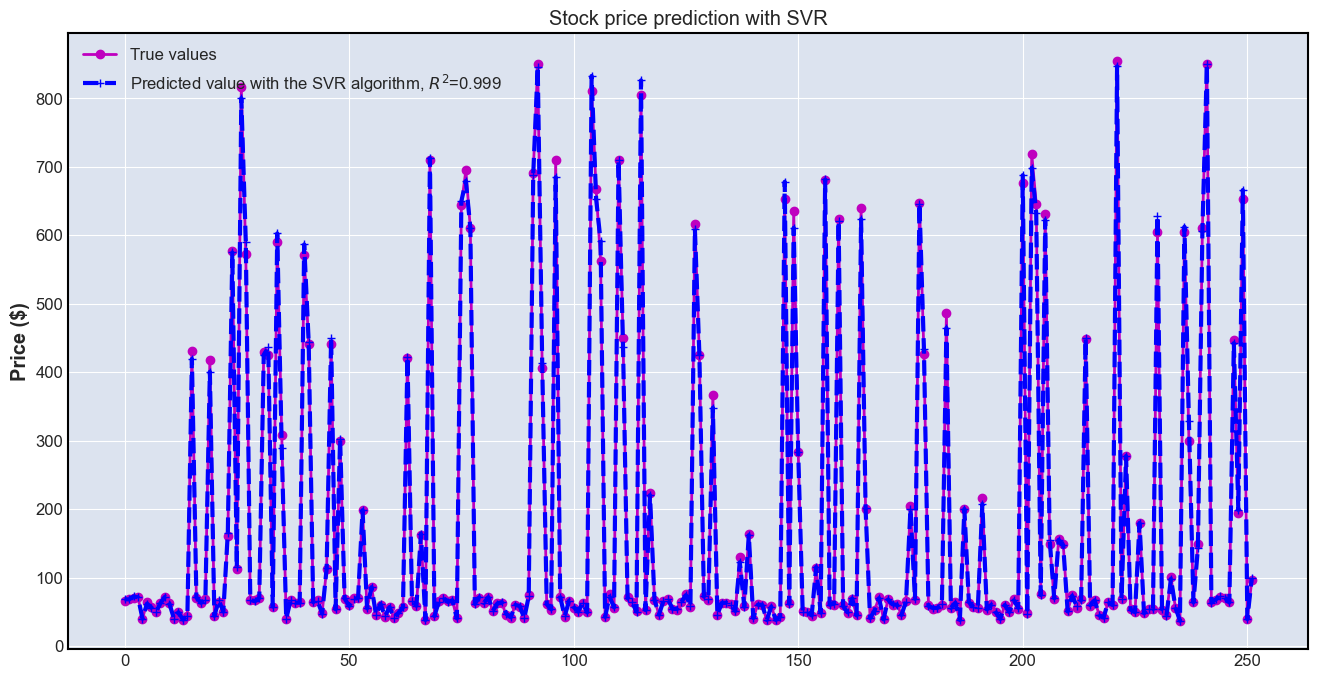

In [33]:
#Perform visualization.
ln_x_test = range(len(x_test))
y_predict = model.predict(x_test)
#Set the canvas.
plt.figure(figsize=(16,8))
#Draw with a red solid line.
plt.plot (ln_x_test, y_test, 'm-o', lw=2, label=u'True values')
#Draw with a green solid line.
plt.plot (ln_x_test, y_predict, 'b--+', lw = 3, label=u'Predicted value with the SVR algorithm, $R^2$=%.3f' % (model.best_score_))
#Display in a diagram.
plt.legend(loc ='upper left')
plt.grid(True)
plt.title(u"Stock price prediction with SVR")
plt.ylabel('Price ($)')
plt.show()